In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 03 Preprocessing

## 3-1 Integer Encoding

In [6]:
df['Sex']
mapping = {'male':0, 'female':1}

In [7]:
df['Sex'].map(mapping)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [8]:
df['Sex'] = df['Sex'].map(mapping)

In [9]:
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [10]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: >

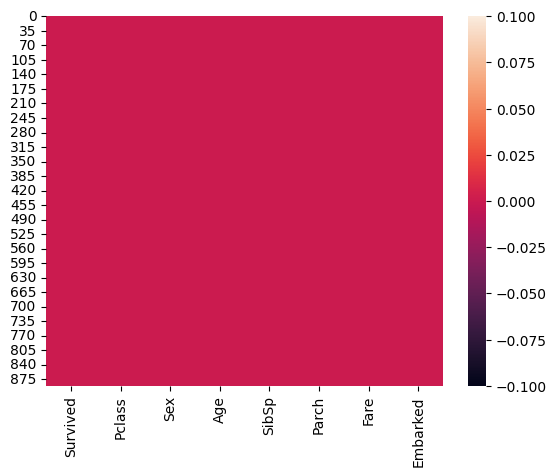

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())

In [15]:
df['Embarked'] #pandas 형태의 데이터

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [16]:
#목표: s,c,q 말고 뭐가 있는지
set(df['Embarked'])

{'C', 'Q', 'S'}

In [17]:
df['Embarked']
mapping = {'Q':0, 'S':1, 'C':2}

In [18]:
df['Embarked'].map(mapping)

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    0
Name: Embarked, Length: 891, dtype: int64

In [19]:
df['Embarked'] = df['Embarked'].map(mapping)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,24.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


## 3-5 Outlier Removal

## (1) 아웃라이어가 얼마나 있나? 확인

In [21]:
df['Age'].skew()

np.float64(0.6577529069911331)

In [22]:
for col in df:
    print("skewness of "+str(col)+ " is "+str(df[col].skew()))

skewness of Survived is 0.4785234382949897
skewness of Pclass is -0.6305479068752845
skewness of Sex is 0.6189208484871982
skewness of Age is 0.6577529069911331
skewness of SibSp is 3.6953517271630565
skewness of Parch is 2.7491170471010933
skewness of Fare is 4.787316519674893
skewness of Embarked is 0.14733077297765435


In [23]:
for col in df.columns:
    print("skewness of "+ col +" is "+ str(df[col].skew()))

skewness of Survived is 0.4785234382949897
skewness of Pclass is -0.6305479068752845
skewness of Sex is 0.6189208484871982
skewness of Age is 0.6577529069911331
skewness of SibSp is 3.6953517271630565
skewness of Parch is 2.7491170471010933
skewness of Fare is 4.787316519674893
skewness of Embarked is 0.14733077297765435


## (2) Visualization of the 'Fare' Column

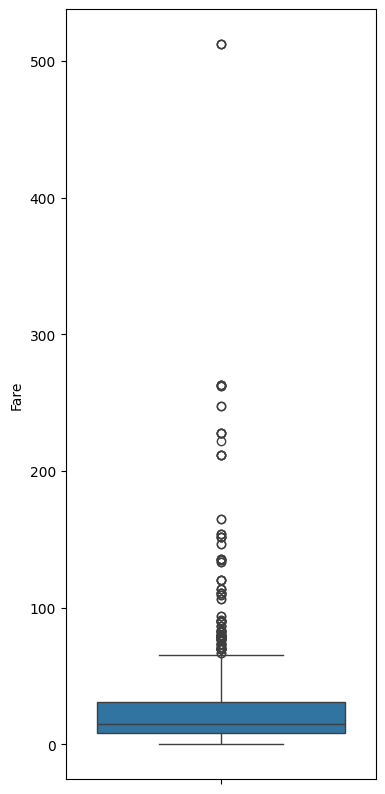

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,10))
sns.boxplot(df['Fare'])
plt.show()

In [25]:
## (3) outlier removal 


In [26]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

In [27]:
Q1

np.float64(7.9104)

In [28]:
Q3

np.float64(31.0)

In [29]:
IQR = Q3-Q1

In [30]:
IQR

np.float64(23.0896)

In [31]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR

In [32]:
lower_whisker

np.float64(-26.724)

In [33]:
upper_whisker

np.float64(65.6344)

### lower whisker보다 작거나 upper whisker 보다 크면 outlier

In [34]:
df['Fare']>upper_whisker

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [35]:
df['Fare']<lower_whisker

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [36]:
(df['Fare']>upper_whisker) | (df['Fare']<lower_whisker)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [37]:
#얘네들이 아웃라이어!
df[(df['Fare']>upper_whisker) | (df['Fare']<lower_whisker) == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2
27,0,1,0,19.0,3,2,263.0000,1
31,1,1,1,24.0,1,0,146.5208,2
34,0,1,0,28.0,1,0,82.1708,2
52,1,1,1,49.0,1,0,76.7292,2
...,...,...,...,...,...,...,...,...
846,0,3,0,24.0,8,2,69.5500,1
849,1,1,1,24.0,1,0,89.1042,2
856,1,1,1,45.0,1,1,164.8667,1
863,0,3,1,24.0,8,2,69.5500,1


In [38]:
#아웃라이어가 아닌 데이터:
(df['Fare']<=upper_whisker) & (df['Fare']>=lower_whisker)

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 891, dtype: bool

In [39]:
df[(df['Fare']<=upper_whisker) & (df['Fare']>=lower_whisker)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,24.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


In [40]:
df = df[(df['Fare']<upper_whisker) & (df['Fare']>lower_whisker)]

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,24.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


In [42]:
df = df.reset_index()

In [43]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,7.2500,1
1,2,1,3,1,26.0,0,0,7.9250,1
2,3,1,1,1,35.0,1,0,53.1000,1
3,4,0,3,0,35.0,0,0,8.0500,1
4,5,0,3,0,24.0,0,0,8.4583,0


In [44]:
# 새로 생긴 index column 없애기
# pandas의 index location 줄여서 (iloc) : indexing을 해서 원하는 부분만 자를 수 있음.
df.iloc[:,1:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,3,1,26.0,0,0,7.9250,1
2,1,1,1,35.0,1,0,53.1000,1
3,0,3,0,35.0,0,0,8.0500,1
4,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
770,0,2,0,27.0,0,0,13.0000,1
771,1,1,1,19.0,0,0,30.0000,1
772,0,3,1,24.0,1,2,23.4500,1
773,1,1,0,26.0,0,0,30.0000,2


In [45]:
df = df.iloc[:,1:]

In [46]:
for col in df.columns:
    print("skewness of "+ col +" is "+ str(df[col].skew()))

skewness of Survived is 0.6798738387603496
skewness of Pclass is -1.0295968890475515
skewness of Sex is 0.7988800220538848
skewness of Age is 0.6845730984053457
skewness of SibSp is 2.7906891466584316
skewness of Parch is 3.145570664583091
skewness of Fare is 1.4306715336945985
skewness of Embarked is 0.11733953621182389


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    int64  
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.6 KB


## 3-6 Scaling


In [48]:
for col in df.columns:
    print("skewness of "+ col +" is "+ str(df[col].skew()))

# skew가 되어있는 fare column의 경우 standard scalar를 사용
# skew가 좀 덜 된 age column의 경우에는 minmax scalar를 사용

skewness of Survived is 0.6798738387603496
skewness of Pclass is -1.0295968890475515
skewness of Sex is 0.7988800220538848
skewness of Age is 0.6845730984053457
skewness of SibSp is 2.7906891466584316
skewness of Parch is 3.145570664583091
skewness of Fare is 1.4306715336945985
skewness of Embarked is 0.11733953621182389


### (1) standard scalar사용해서 Fare Column을 scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# StandardScaler라는 class의 instance를 제작
scaler = StandardScaler()

In [51]:
df['Fare']

0       7.2500
1       7.9250
2      53.1000
3       8.0500
4       8.4583
        ...   
770    13.0000
771    30.0000
772    23.4500
773    30.0000
774     7.7500
Name: Fare, Length: 775, dtype: float64

In [52]:
np.array(df['Fare'].head)

array(<bound method NDFrame.head of 0       7.2500
1       7.9250
2      53.1000
3       8.0500
4       8.4583
        ...   
770    13.0000
771    30.0000
772    23.4500
773    30.0000
774     7.7500
Name: Fare, Length: 775, dtype: float64>, dtype=object)

In [53]:
scaler.fit_transform(np.array(df['Fare']))

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.25    7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333 30.0708
 16.7    26.55    8.05   31.275   7.8542 16.     29.125  13.     18.
  7.225  26.     13.      8.0292 35.5    21.075  31.3875  7.225   7.8792
  7.8958 27.7208  7.75   10.5    52.      7.2292  8.05   18.     11.2417
  9.475  21.      7.8958 41.5792  7.8792  8.05   15.5     7.75   21.6792
 17.8    39.6875  7.8    26.     61.9792 35.5    10.5     7.2292 27.75
 46.9     7.2292 27.9    27.7208 15.2458 10.5     8.1583  7.925   8.6625
 10.5    46.9    14.4542 56.4958  7.65    7.8958  8.05   29.     12.475
  9.      9.5     7.7875 47.1    10.5    15.85   34.375   8.05    8.05
  8.05    7.8542 61.175  20.575   7.25    8.05   34.6542 63.3583 23.
 26.      7.8958  7.8958  8.6542  7.925   7.8958  7.65    7.775   7.8958
 24.15   52.     14.4542  8.05    9.825  14.4583  7.925   7.75   21.
 31.275   8.05   30.0708 13.     11.2417  7.75    7.1417 22.3583  6.975
  7.8958  7.05   14.5    26.     13.     15.0458 26.2833 53.1     9.2167
 15.2458  7.75   15.85    6.75   11.5    36.75    7.7958 34.375  26.
 13.     12.525   8.05   14.5     7.3125 61.3792  7.7333  8.05    8.6625
 16.1    15.75    7.775   8.6625 39.6875 20.525  55.     27.9    25.925
 56.4958 33.5    29.125  11.1333  7.925  30.6958  7.8542 25.4667 28.7125
 13.      0.     15.05   31.3875 39.     22.025  50.     15.5    26.55
 15.5     7.8958 13.     13.      7.8542 26.     27.7208  7.75    8.4042
  7.75   13.      9.5     6.4958  7.225   8.05   10.4625 15.85   18.7875
  7.75   31.      7.05   21.      7.25   13.      7.75    7.925  27.
 10.5     8.05   13.      8.05    7.8958  9.35   10.5     7.25   13.
 25.4667  7.775  13.5    31.3875 10.5     7.55   26.     26.25   10.5
 12.275  14.4542 15.5    10.5     7.125   7.225   7.775  14.5    52.5542
 26.      7.25   10.4625 26.55   16.1    20.2125 15.2458 26.      7.75
 31.3875  0.      7.75   10.5    39.6875  7.775  31.      0.     19.5
 29.7     7.75    7.75    0.     29.125  20.25    7.75    7.8542  9.5
  8.05   26.      8.6625  9.5     7.8958 13.      7.75   12.875   8.85
  7.8958 27.7208  7.2292 30.5     7.75   23.25    0.     12.35    8.05
 24.     56.9292 26.      7.8958 26.25    7.8542 26.     14.      7.25
  7.8958 12.35   29.      6.2375 13.     20.525  57.9792 23.25   28.5
 18.      7.8958  8.05   35.5    26.     13.     13.     13.     13.
 13.     16.1    15.9     8.6625  9.225  35.      7.2292 17.8     7.225
  9.5    55.     13.      7.8792  7.8792 27.9    27.7208 14.4542  7.05
 15.5     7.25    7.2292  7.75   55.4417  6.4958  8.05   21.075   7.25
  4.0125  7.775  15.7417  7.925  52.      7.8958 46.9    13.      7.7292
 12.      7.7958  7.925  16.7     7.7958  7.8542 26.     10.5    12.65
  7.925   8.05    9.825  15.85    8.6625 21.      7.75   18.75    7.775
 25.4667  7.8958  6.8583  0.      7.925   8.05   32.5    13.     13.
 24.15    7.8958  7.7333  7.875  14.4    20.2125  7.25   26.     26.
  7.75    8.05   26.55   16.1    26.      7.125  55.9    34.375  18.75
 10.5    26.25    9.5     7.775  13.      8.1125 19.5    26.55   19.2583
 30.5    27.75   19.9667 27.75    8.05    7.8958 26.55   51.8625 10.5
  7.75   26.55    8.05   38.5    13.      8.05    7.05    0.     26.55
  7.725  19.2583  7.25    8.6625 27.75   13.7917  9.8375 52.     21.
  7.0458  7.5208 12.2875 46.9     0.      8.05    9.5875 25.4667 29.7
  8.05   15.9    19.9667  7.25   30.5    49.5042  8.05   14.4583 15.1
  7.7958  8.6625  7.75    7.6292  9.5875 26.     26.55   22.525  56.4958
  7.75    8.05   26.2875 59.4     7.4958 34.0208 10.5    24.15   26.
  7.8958  7.8958  7.225  57.9792  7.2292  7.75   10.5     7.925  11.5
 26.      7.2292  7.2292 22.3583  8.6625 26.25   26.55   14.5    49.5
 31.275  31.275  26.     26.     26.     13.8625 20.525  36.75   26.
  7.8292  7.225   7.775  26.55   39.6    17.4     7.75    7.8958 13.5
  8.05    8.05   24.15    7.8958 21.075   7.2292  7.8542 10.5    51.4792
 26.3875  7.75    8.05   14.5    13.     55.9    14.4583  7.925  30.
 26.     40.125   8.7125 15.      8.05    8.05    7.125   7.25    7.75
 26.     24.15   33.      0.      7.225  56.9292 27.      7.8958 42.4
  8.05   26.55   15.55    7.8958 30.5    41.5792 31.275   7.05   15.5
  7.75    8.05   65.     14.4    16.1    39.     10.5    14.4542 52.5542
 15.7417  7.8542 16.1    32.3208 12.35    7.8958  7.7333 30.      7.0542
 30.5     0.     27.9    13.      7.925  26.25   39.6875 16.1     7.8542
 27.9    56.4958 19.2583  7.8958 35.5     7.55    7.55    7.8958 23.
  8.4333  7.8292  6.75    7.8958 15.5    13.      7.225  25.5875  7.4958
  7.925  13.      7.775   8.05   52.     39.     52.     10.5    13.
  0.      7.775   8.05    9.8417 46.9     8.1375  9.225  46.9    39.
 41.5792 39.6875 10.1708  7.7958 57.     13.4167 56.4958  7.225  26.55
 13.5     8.05    7.7333  7.65   26.2875 14.4542  7.7417  7.8542 26.
 13.5    26.2875 15.2458 49.5042 26.55   52.      9.4833 13.      7.65
 10.5    15.5     7.775  33.      7.0542 13.     13.     53.1     8.6625
 21.      7.7375 26.      7.925  18.7875  0.     13.     13.     16.1
 34.375   7.8958  7.8958 30.     16.1     7.925  20.25   13.     53.1
  7.75   23.     12.475   9.5     7.8958 65.     14.5     7.7958 11.5
  8.05   14.5     7.125   7.2292  7.775  39.6     7.75   24.15    8.3625
  9.5     7.8542 10.5     7.225  23.      7.75    7.75   12.475   7.7375
  7.2292 57.     30.     23.45    7.05    7.25    7.4958 29.125  20.575
  7.75   26.     30.6958  7.8958 13.     25.9292  8.6833  7.2292 24.15
 13.     26.25    8.5167  6.975   7.775   0.      7.775  13.     53.1
  7.8875 24.15   10.5    31.275   8.05    0.      7.925  37.0042  6.45
 27.9     8.6625  0.     12.475  39.6875  6.95   56.4958 37.0042  7.75
 14.4542 18.75    7.2292  7.8542  8.3     8.6625  8.05   56.4958 29.7
  7.925  10.5    31.      6.4375  8.6625  7.55    7.8958 33.     31.275
  7.775  15.2458 39.4    26.      9.35   26.55   19.2583  7.2292 14.1083
 11.5    25.9292 13.     13.     13.8583 50.4958  9.5    11.1333  7.8958
 52.5542  5.      9.     24.      7.225   9.8458  7.8958  7.8958 26.
  7.8958 10.5167 10.5     7.05   29.125  13.     30.     23.45   30.
  7.75  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
np.array(df['Fare']).shape

(775,)

In [57]:
np.array(df['Fare']).reshape(775, 1)

array([[ 7.25  ],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [ 8.4583],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708],
       [16.7   ],
       [26.55  ],
       [ 8.05  ],
       [31.275 ],
       [ 7.8542],
       [16.    ],
       [29.125 ],
       [13.    ],
       [18.    ],
       [ 7.225 ],
       [26.    ],
       [13.    ],
       [ 8.0292],
       [35.5   ],
       [21.075 ],
       [31.3875],
       [ 7.225 ],
       [ 7.8792],
       [ 7.8958],
       [27.7208],
       [ 7.75  ],
       [10.5   ],
       [52.    ],
       [ 7.2292],
       [ 8.05  ],
       [18.    ],
       [11.2417],
       [ 9.475 ],
       [21.    ],
       [ 7.8958],
       [41.5792],
       [ 7.8792],
       [ 8.05  ],
       [15.5   ],
       [ 7.75  ],
       [21.6792],
       [17.8   ],
       [39.6875],
       [ 7.8   ],
       [26.    ],
       [61.9792],
       [35.5   ],
       [10.5   ],
       [ 7.2292],
       [27.75  ],
       [46.9   ],
       [ 7

In [59]:
np.array(df['Fare']).reshape(-1,1)
#The last dimension is 1, and the dimension in front, -1, means, "make the choice considering that the final dimension is 1"

array([[ 7.25  ],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [ 8.4583],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708],
       [16.7   ],
       [26.55  ],
       [ 8.05  ],
       [31.275 ],
       [ 7.8542],
       [16.    ],
       [29.125 ],
       [13.    ],
       [18.    ],
       [ 7.225 ],
       [26.    ],
       [13.    ],
       [ 8.0292],
       [35.5   ],
       [21.075 ],
       [31.3875],
       [ 7.225 ],
       [ 7.8792],
       [ 7.8958],
       [27.7208],
       [ 7.75  ],
       [10.5   ],
       [52.    ],
       [ 7.2292],
       [ 8.05  ],
       [18.    ],
       [11.2417],
       [ 9.475 ],
       [21.    ],
       [ 7.8958],
       [41.5792],
       [ 7.8792],
       [ 8.05  ],
       [15.5   ],
       [ 7.75  ],
       [21.6792],
       [17.8   ],
       [39.6875],
       [ 7.8   ],
       [26.    ],
       [61.9792],
       [35.5   ],
       [10.5   ],
       [ 7.2292],
       [27.75  ],
       [46.9   ],
       [ 7

In [61]:
np.array(df['Fare']).reshape(-1,1).shape

(775, 1)

In [62]:
reshaped_array = np.array(df['Fare']).reshape(-1,1)

In [63]:
reshaped_array.shape

(775, 1)

In [64]:
scaler.fit_transform(reshaped_array)

array([[-7.79117066e-01],
       [-7.29372504e-01],
       [ 2.59982835e+00],
       [-7.20160548e-01],
       [-6.90070616e-01],
       [ 2.50862999e+00],
       [ 2.39725255e-01],
       [-4.92934760e-01],
       [ 9.02676557e-01],
       [-8.26932009e-02],
       [ 6.43208923e-01],
       [-7.20160548e-01],
       [ 9.91420855e-01],
       [-7.34590156e-01],
       [-1.34280154e-01],
       [ 8.32975214e-01],
       [-3.55367095e-01],
       [ 1.31111403e-02],
       [-7.80959457e-01],
       [ 6.02676317e-01],
       [-3.55367095e-01],
       [-7.21693418e-01],
       [ 1.30278496e+00],
       [ 2.39725255e-01],
       [ 9.99711616e-01],
       [-7.80959457e-01],
       [-7.32747765e-01],
       [-7.31524417e-01],
       [ 7.29491786e-01],
       [-7.42269242e-01],
       [-5.39606213e-01],
       [ 2.51876314e+00],
       [-7.80649935e-01],
       [-7.20160548e-01],
       [ 1.31111403e-02],
       [-4.84946151e-01],
       [-6.15144251e-01],
       [ 2.34198082e-01],
       [-7.3

In [65]:
scaler.fit_transform(reshaped_array).flatten()

array([-7.79117066e-01, -7.29372504e-01,  2.59982835e+00, -7.20160548e-01,
       -6.90070616e-01,  2.50862999e+00,  2.39725255e-01, -4.92934760e-01,
        9.02676557e-01, -8.26932009e-02,  6.43208923e-01, -7.20160548e-01,
        9.91420855e-01, -7.34590156e-01, -1.34280154e-01,  8.32975214e-01,
       -3.55367095e-01,  1.31111403e-02, -7.80959457e-01,  6.02676317e-01,
       -3.55367095e-01, -7.21693418e-01,  1.30278496e+00,  2.39725255e-01,
        9.99711616e-01, -7.80959457e-01, -7.32747765e-01, -7.31524417e-01,
        7.29491786e-01, -7.42269242e-01, -5.39606213e-01,  2.51876314e+00,
       -7.80649935e-01, -7.20160548e-01,  1.31111403e-02, -4.84946151e-01,
       -6.15144251e-01,  2.34198082e-01, -7.31524417e-01,  1.75079554e+00,
       -7.32747765e-01, -7.20160548e-01, -1.71127977e-01, -7.42269242e-01,
        2.84252165e-01, -1.62798914e-03,  1.61138549e+00, -7.38584460e-01,
        6.02676317e-01,  3.25418674e+00,  1.30278496e+00, -5.39606213e-01,
       -7.80649935e-01,  

In [66]:
scaler.fit_transform(reshaped_array).flatten().shape

(775,)

In [67]:
pd.Series(scaler.fit_transform(reshaped_array).flatten())

0     -0.779117
1     -0.729373
2      2.599828
3     -0.720161
4     -0.690071
         ...   
770   -0.355367
771    0.897459
772    0.414752
773    0.897459
774   -0.742269
Length: 775, dtype: float64

In [68]:
df['Fare'] = pd.Series(scaler.fit_transform(reshaped_array).flatten())

In [69]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,-0.779117,1
1,1,3,1,26.0,0,0,-0.729373,1
2,1,1,1,35.0,1,0,2.599828,1
3,0,3,0,35.0,0,0,-0.720161,1
4,0,3,0,24.0,0,0,-0.690071,0


### (2) MinMax Scaler
applicable to data following standard deviation

see minmax scaler can be applied to Age

In [70]:
import scipy.stats as stats

In [74]:
age_array = np.array(df['Age'])
age_array

array([22.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  , 31.  ,
       24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  , 24.  ,
       24.  , 40.  , 24.  , 66.  , 42.  , 24.  , 21.  , 18.  , 14.  ,
       40.  , 27.  , 24.  ,  3.  , 19.  , 24.  , 24.  , 24.  , 24.  ,
       18.  ,  7.  , 21.  , 29.  , 65.  , 24.  , 21.  , 28.5 ,  5.  ,
       11.  , 22.  ,  4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  ,
       32.  , 16.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  ,
       22.  , 29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 33.  , 37.  , 28.  , 21.  , 24.  , 38.  ,
       24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 , 29.  ,
        2.  , 24.  , 32.5 , 32.5 , 12.  , 24.  , 24.  , 24.  , 45.  ,
       33.  , 20.  , 47.  , 29.  , 25.  , 23.  , 19.  , 37.  , 16.  ,
       24.  , 22.  ,

In [68]:
# is normal distribution made by the mean and standard deviation of age array 
# similar to the actual distribution of age array?
stats.kstest(age_array, 'norm', args = (age_array.mean(), age_array.std()))

KstestResult(statistic=np.float64(0.1428123983369468), pvalue=np.float64(2.959440445338334e-14), statistic_location=np.float64(24.0), statistic_sign=np.int8(1))

explained super simply, because the p value is less than 0.05, 

we can say that the age's distribution follows normal distribution. 

That said, we can use MinMax Scalar to age!

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,-0.779117,1
1,1,3,1,26.0,0,0,-0.729373,1
2,1,1,1,35.0,1,0,2.599828,1
3,0,3,0,35.0,0,0,-0.720161,1
4,0,3,0,24.0,0,0,-0.690071,0


In [71]:
scaler = MinMaxScaler()

In [72]:
df['Age'] = np.array(df['Age']).reshape(-1,1)

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,-0.779117,1
1,1,3,1,26.0,0,0,-0.729373,1
2,1,1,1,35.0,1,0,2.599828,1
3,0,3,0,35.0,0,0,-0.720161,1
4,0,3,0,24.0,0,0,-0.690071,0


## 3-7 train-test splitting

In [74]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### (1) dividing feature (the output of ML) - feature (the input)

In [76]:
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [77]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,-0.779117,1
1,3,1,26.0,0,0,-0.729373,1
2,1,1,35.0,1,0,2.599828,1
3,3,0,35.0,0,0,-0.720161,1
4,3,0,24.0,0,0,-0.690071,0
...,...,...,...,...,...,...,...
770,2,0,27.0,0,0,-0.355367,1
771,1,1,19.0,0,0,0.897459,1
772,3,1,24.0,1,2,0.414752,1
773,1,0,26.0,0,0,0.897459,2


In [78]:
target = df['Survived']

In [79]:
target

0      0
1      1
2      1
3      0
4      0
      ..
770    0
771    1
772    0
773    1
774    0
Name: Survived, Length: 775, dtype: int64